### 1. 차원축소
- 데이터 생성

In [ ]:
from sklearn.datasets import load_breast_cancer

# 원본 데이터
bc = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 차원 축소 데이터 - 2, 5, 10차원
bc_std = StandardScaler().fit_transform(bc.data)

pca2 = PCA(2)
bc_pca2 = pca2.fit_transform(bc_std)

pca5 = PCA(5)
bc_pca5 = pca5.fit_transform(bc_std)

pca10 = PCA(10)
bc_pca10 = pca10.fit_transform(bc_std)

- 앙상블 모델

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

lrc = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
voc = VotingClassifier([('LRC', lrc), ('SVC', svc), ('KNN', knn)], voting='hard')

- 데이터 분류 및 정확도 측정

In [ ]:
from sklearn.model_selection import train_test_split

# 원본 데이터
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, stratify=bc.target)
voc.fit(X_train, y_train)
voc.score(X_test, y_test)

0.916083916083916

In [ ]:
# 2차원 데이터
X_train, X_test, y_train, y_test = train_test_split(bc_pca2, bc.target, stratify=bc.target)
voc.fit(X_train, y_train)
voc.score(X_test, y_test)

0.951048951048951

In [ ]:
# 5차원 데이터
X_train, X_test, y_train, y_test = train_test_split(bc_pca5, bc.target, stratify=bc.target)
voc.fit(X_train, y_train)
voc.score(X_test, y_test)

0.972027972027972

In [ ]:
# 10차원 데이터
X_train, X_test, y_train, y_test = train_test_split(bc_pca10, bc.target, stratify=bc.target)
voc.fit(X_train, y_train)
voc.score(X_test, y_test)

0.972027972027972

### 2. 군집화

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(bc_std)

KMeans(n_clusters=2)

In [ ]:
import pandas as pd
df = pd.DataFrame({'PC1': bc_pca2[:, 0], 'PC2': bc_pca2[:, 1], 'target': bc.target, 'cluster': kmeans.labels_})
df.sample(5)

,PC1,PC2,target,cluster
44,-0.293547,-0.137099,0,1
429,-3.943473,-2.030016,1,1
27,3.064054,-1.876552,0,0
285,-4.138883,-1.376508,1,1
476,-0.520658,-0.973368,1,1


- 시각화

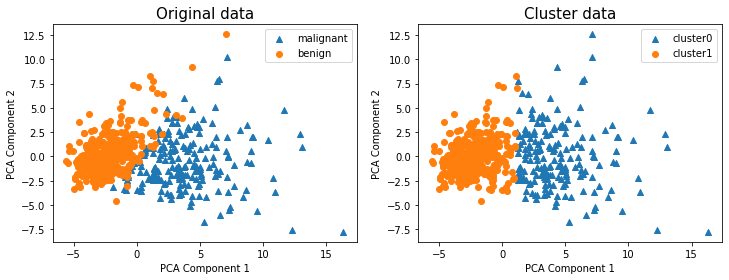

In [ ]:
import matplotlib.pyplot as plt

markers = ['^', 'o']
plt.figure(figsize=(12, 4))
for k, column in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.title('Original data', fontsize=15)
            plt.scatter(x_data, y_data, marker = marker, label=bc.target_names[i])
        else:
            plt.title('Cluster data', fontsize=15)
            plt.scatter(x_data, y_data, marker = marker, label='cluster'+str(i))
    plt.legend()
    plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()